In [120]:
import pandas as pd
import glob
import numpy as np

In [121]:
# Get all of the names of our csvs (os)

# Iterate through .csv files 

# read each csv into pandas df

# add county column

# either store df or concatenate to some output df


In [122]:
# W/ all data add oil price , unemployment cols

In [123]:
csv= glob.glob("*_County.csv")
csv

['Guadalupe_County.csv',
 'Comal_County.csv',
 'Austin_County.csv',
 'Tarrant_County.csv',
 'Bexar_County.csv',
 'Hays_County.csv',
 'Dallas_County.csv',
 'Ellis_County.csv',
 'Travis_County.csv',
 'Fayette_County.csv',
 'Lampasas_County.csv',
 'Smith_County.csv',
 'Ector_County.csv',
 'Bell_County.csv',
 'Lubbock_County.csv',
 'Lamar_County.csv',
 'Willacy_County.csv',
 'Nueces_County.csv',
 'Midland_County.csv',
 'Randall_County.csv',
 'Kaufman_County.csv',
 'Brazos_County.csv',
 'Anderson_County.csv',
 'Taylor_County.csv',
 'Wichita_County.csv',
 'Harris_County.csv',
 'Denton_County.csv',
 'McLennan_County.csv',
 'El_Paso_County.csv',
 'Gonzales_County.csv',
 'Kerr_County.csv',
 'Angelina_County.csv',
 'Victoria_County.csv',
 'Rockwall_County.csv',
 'Jefferson_County.csv',
 'Williamson_County.csv',
 'Galveston_County.csv',
 'Tom_Green_County.csv',
 'Colorado_County.csv',
 'Cameron_County.csv',
 'Nacogdoches_County.csv',
 'Montgomery_County.csv',
 'Johnson_County.csv',
 'Brazoria_Cou

In [124]:
one=csv[0][:-11]
one

'Guadalupe'

In [125]:
read1= pd.read_csv(csv[0])
read1["County"]=csv[0][:-11]
read2= pd.read_csv(csv[1])
read2["County"]=csv[1][:-11]
read3= pd.concat([read1,read2])
read3.head()

,Date,Sales,Dollar Volume,Average Price,Median Price,Total Listings,Months Invntory,County
0,Jan 2011,70,"11,926,588","170,380","168,052",NaN,NaN,Guadalupe
1,Feb 2011,88,"13,808,445","156,914","150,000",NaN,NaN,Guadalupe
2,Mar 2011,131,"20,943,149","159,871","157,000",NaN,NaN,Guadalupe
3,Apr 2011,133,"21,632,252","162,649","156,990",NaN,NaN,Guadalupe
4,May 2011,159,"26,333,193","165,618","156,000",NaN,NaN,Guadalupe


In [126]:
complete_df = read1
for county in csv[0:]:
    new_df= pd.read_csv(county)
    new_df["County"]=county[:-11]
    
    complete_df = pd.concat([complete_df, new_df])

In [127]:
complete_df.shape

(4557, 8)

In [128]:
len(complete_df.County.unique())

47

In [129]:
complete_df.head()

,Date,Sales,Dollar Volume,Average Price,Median Price,Total Listings,Months Invntory,County
0,Jan 2011,70,"11,926,588","170,380","168,052",NaN,NaN,Guadalupe
1,Feb 2011,88,"13,808,445","156,914","150,000",NaN,NaN,Guadalupe
2,Mar 2011,131,"20,943,149","159,871","157,000",NaN,NaN,Guadalupe
3,Apr 2011,133,"21,632,252","162,649","156,990",NaN,NaN,Guadalupe
4,May 2011,159,"26,333,193","165,618","156,000",NaN,NaN,Guadalupe


In [130]:
complete_df.reset_index(inplace=True, drop= True)
complete_df.head()

,Date,Sales,Dollar Volume,Average Price,Median Price,Total Listings,Months Invntory,County
0,Jan 2011,70,"11,926,588","170,380","168,052",NaN,NaN,Guadalupe
1,Feb 2011,88,"13,808,445","156,914","150,000",NaN,NaN,Guadalupe
2,Mar 2011,131,"20,943,149","159,871","157,000",NaN,NaN,Guadalupe
3,Apr 2011,133,"21,632,252","162,649","156,990",NaN,NaN,Guadalupe
4,May 2011,159,"26,333,193","165,618","156,000",NaN,NaN,Guadalupe


In [131]:
complete_df.to_csv("Complete_house_pricing_data.csv")

In [132]:
unemployment= pd.read_excel("TX-Unemployment data_BLS.xlsx",skiprows=10)
unemployment.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2008,4.3,4.3,4.3,4.4,4.5,4.6,4.8,4.9,5.1,5.3,5.6,5.8
1,2009,6.1,6.3,6.5,6.6,7.6,8.0,8.2,8.3,8.3,8.3,8.3,8.3
2,2010,8.3,8.3,8.3,8.2,8.1,8.0,8.0,8.0,8.1,8.1,8.1,8.1
3,2011,8.0,7.9,7.9,7.9,7.9,7.9,7.9,7.8,7.7,7.6,7.4,7.2
4,2012,7.1,7.0,6.9,6.9,6.9,6.8,6.7,6.6,6.5,6.5,6.5,6.5


In [133]:
unemployment.loc[unemployment['Year']==2011,'Jan'].values[0]

8.0

In [134]:
un= unemployment.set_index("Year")
un

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2008,4.3,4.3,4.3,4.4,4.5,4.6,4.8,4.9,5.1,5.3,5.6,5.8
2009,6.1,6.3,6.5,6.6,7.6,8.0,8.2,8.3,8.3,8.3,8.3,8.3
2010,8.3,8.3,8.3,8.2,8.1,8.0,8.0,8.0,8.1,8.1,8.1,8.1
2011,8.0,7.9,7.9,7.9,7.9,7.9,7.9,7.8,7.7,7.6,7.4,7.2
2012,7.1,7.0,6.9,6.9,6.9,6.8,6.7,6.6,6.5,6.5,6.5,6.5
2013,6.5,6.5,6.5,6.5,6.4,6.3,6.3,6.2,6.1,6.0,5.9,5.8
2014,5.7,5.5,5.4,5.3,5.2,5.1,5.1,5.0,4.9,4.8,4.7,4.6
2015,4.5,4.4,4.4,4.4,4.4,4.4,4.4,4.4,4.4,4.4,4.5,4.5
2016,4.5,4.5,4.5,4.5,4.6,4.6,4.7,4.7,4.7,4.8,4.8,4.8


In [135]:
un.loc[2008,"Dec"]

5.8

In [136]:
one = complete_df.loc[0,'Date']
one

'Jan 2011'

In [137]:
month, year = one.split(' ')
year = int(year)
print(month, year)

Jan 2011


In [138]:
un.loc[year,month]
un.loc[2011, 'Jan']

8.0

In [139]:
date = one
month, year = date.split(' ')


In [140]:
def reference_cell(date):
    # split date into month, year
    month, year= date.split(" ")
    
    #convert year to int
    year= int(year)
#     reference cell in position year, month
    un_value= un.loc[year, month]
    # Return output
    return un_value 

In [141]:
reference_cell("Jan 2011")

8.0

In [142]:
complete_df["unemployment"]=complete_df['Date'].apply(reference_cell)


In [143]:
complete_df.head()

,Date,Sales,Dollar Volume,Average Price,Median Price,Total Listings,Months Invntory,County,unemployment
0,Jan 2011,70,"11,926,588","170,380","168,052",NaN,NaN,Guadalupe,8.0
1,Feb 2011,88,"13,808,445","156,914","150,000",NaN,NaN,Guadalupe,7.9
2,Mar 2011,131,"20,943,149","159,871","157,000",NaN,NaN,Guadalupe,7.9
3,Apr 2011,133,"21,632,252","162,649","156,990",NaN,NaN,Guadalupe,7.9
4,May 2011,159,"26,333,193","165,618","156,000",NaN,NaN,Guadalupe,7.9


In [144]:
complete_df['unemployment'] = complete_df['Date'].apply(lambda x: un.loc[int(x.split()[1]), x.split()[0]])
complete_df.head()

,Date,Sales,Dollar Volume,Average Price,Median Price,Total Listings,Months Invntory,County,unemployment
0,Jan 2011,70,"11,926,588","170,380","168,052",NaN,NaN,Guadalupe,8.0
1,Feb 2011,88,"13,808,445","156,914","150,000",NaN,NaN,Guadalupe,7.9
2,Mar 2011,131,"20,943,149","159,871","157,000",NaN,NaN,Guadalupe,7.9
3,Apr 2011,133,"21,632,252","162,649","156,990",NaN,NaN,Guadalupe,7.9
4,May 2011,159,"26,333,193","165,618","156,000",NaN,NaN,Guadalupe,7.9


In [145]:
hp= pd.read_csv("complete_file.csv")
hp.head()

,Unnamed: 0,level_0,index,Date,Sales,Dollar Volume,Average Price,Median Price,Total Listings,Months Invntory,County,Oil Price,Unemployment
0,2185,2185,0,01/01/11,14.0,1079600.0,77114.0,71700.0,344.0,33.6,Anderson,89.17,8.0
1,2186,2186,1,02/01/11,21.0,2286934.0,108902.0,74000.0,371.0,31.6,Anderson,88.58,7.8
2,2187,2187,2,03/01/11,25.0,3013550.0,120542.0,92000.0,369.0,27.3,Anderson,102.86,7.5
3,2188,2188,3,04/01/11,27.0,3203350.0,118643.0,119500.0,362.0,23.2,Anderson,109.53,7.1
4,2189,2189,4,05/01/11,28.0,2414161.0,86220.0,71250.0,381.0,22.6,Anderson,100.90,7.2


In [146]:
#cleaning the data
hpdf=pd.DataFrame(hp)
hpdf.head()

,Unnamed: 0,level_0,index,Date,Sales,Dollar Volume,Average Price,Median Price,Total Listings,Months Invntory,County,Oil Price,Unemployment
0,2185,2185,0,01/01/11,14.0,1079600.0,77114.0,71700.0,344.0,33.6,Anderson,89.17,8.0
1,2186,2186,1,02/01/11,21.0,2286934.0,108902.0,74000.0,371.0,31.6,Anderson,88.58,7.8
2,2187,2187,2,03/01/11,25.0,3013550.0,120542.0,92000.0,369.0,27.3,Anderson,102.86,7.5
3,2188,2188,3,04/01/11,27.0,3203350.0,118643.0,119500.0,362.0,23.2,Anderson,109.53,7.1
4,2189,2189,4,05/01/11,28.0,2414161.0,86220.0,71250.0,381.0,22.6,Anderson,100.90,7.2


In [147]:
hpdf[["Date","County","Oil Price", "Unemployment", "Average Price","Median Price" ]]
hpdf.head()

,Unnamed: 0,level_0,index,Date,Sales,Dollar Volume,Average Price,Median Price,Total Listings,Months Invntory,County,Oil Price,Unemployment
0,2185,2185,0,01/01/11,14.0,1079600.0,77114.0,71700.0,344.0,33.6,Anderson,89.17,8.0
1,2186,2186,1,02/01/11,21.0,2286934.0,108902.0,74000.0,371.0,31.6,Anderson,88.58,7.8
2,2187,2187,2,03/01/11,25.0,3013550.0,120542.0,92000.0,369.0,27.3,Anderson,102.86,7.5
3,2188,2188,3,04/01/11,27.0,3203350.0,118643.0,119500.0,362.0,23.2,Anderson,109.53,7.1
4,2189,2189,4,05/01/11,28.0,2414161.0,86220.0,71250.0,381.0,22.6,Anderson,100.90,7.2


In [148]:
hpdf=hpdf.rename(columns={"Average Price":"Housing Average Price",
                          "Median Price": "Housing Median Price"})
hpdf.head()

,Unnamed: 0,level_0,index,Date,Sales,Dollar Volume,Housing Average Price,Housing Median Price,Total Listings,Months Invntory,County,Oil Price,Unemployment
0,2185,2185,0,01/01/11,14.0,1079600.0,77114.0,71700.0,344.0,33.6,Anderson,89.17,8.0
1,2186,2186,1,02/01/11,21.0,2286934.0,108902.0,74000.0,371.0,31.6,Anderson,88.58,7.8
2,2187,2187,2,03/01/11,25.0,3013550.0,120542.0,92000.0,369.0,27.3,Anderson,102.86,7.5
3,2188,2188,3,04/01/11,27.0,3203350.0,118643.0,119500.0,362.0,23.2,Anderson,109.53,7.1
4,2189,2189,4,05/01/11,28.0,2414161.0,86220.0,71250.0,381.0,22.6,Anderson,100.90,7.2


In [149]:
hpdf_cl=hpdf[["Date","County","Oil Price", "Unemployment","Housing Average Price","Housing Median Price"]]
hpdf_cl.head(5)

,Date,County,Oil Price,Unemployment,Housing Average Price,Housing Median Price
0,01/01/11,Anderson,89.17,8.0,77114.0,71700.0
1,02/01/11,Anderson,88.58,7.8,108902.0,74000.0
2,03/01/11,Anderson,102.86,7.5,120542.0,92000.0
3,04/01/11,Anderson,109.53,7.1,118643.0,119500.0
4,05/01/11,Anderson,100.90,7.2,86220.0,71250.0


In [150]:
hpdf_c= hpdf_cl.loc[hpdf_cl["County"]== "Anderson",:]
hpdf_c.head()

,Date,County,Oil Price,Unemployment,Housing Average Price,Housing Median Price
0,01/01/11,Anderson,89.17,8.0,77114.0,71700.0
1,02/01/11,Anderson,88.58,7.8,108902.0,74000.0
2,03/01/11,Anderson,102.86,7.5,120542.0,92000.0
3,04/01/11,Anderson,109.53,7.1,118643.0,119500.0
4,05/01/11,Anderson,100.90,7.2,86220.0,71250.0


In [151]:
County_list=["Austin", "Brazoria", "Fort_Bend", "Galveston", "Harris", "Montgomery"]
County_list_Houston = pd.DataFrame()
for item in County_list:    
    hpdf_c= hpdf_cl.loc[hpdf_cl["County"]== item,:]
    County_list_Houston = County_list_Houston.append(hpdf_c)
County_list_Houston.head()

,Date,County,Oil Price,Unemployment,Housing Average Price,Housing Median Price
144,01/01/11,Austin,89.17,8.3,190417.0,208500.0
145,02/01/11,Austin,88.58,8.2,126655.0,133025.0
146,03/01/11,Austin,102.86,7.8,174726.0,118000.0
147,04/01/11,Austin,109.53,7.4,125583.0,148250.0
148,05/01/11,Austin,100.90,7.5,120050.0,125000.0


In [152]:
hpdf_c= hpdf_cl.loc[hpdf_cl["County"].isin(County_list),:]
hpdf_c.County.unique()

array(['Austin', 'Brazoria', 'Fort_Bend', 'Galveston', 'Harris',
       'Montgomery'], dtype=object)

In [153]:
# hpdf_cl['County']
def check_county(county):
    if county in County_list:
        return True
    else:
        return False

In [154]:
hpdf_cl.loc[12,'Oil Price']

100.27

In [155]:
hpdf_cl.loc[hpdf_cl.County.apply(check_county), :]

,Date,County,Oil Price,Unemployment,Housing Average Price,Housing Median Price
144,01/01/11,Austin,89.17,8.3,190417.0,208500.0
145,02/01/11,Austin,88.58,8.2,126655.0,133025.0
146,03/01/11,Austin,102.86,7.8,174726.0,118000.0
147,04/01/11,Austin,109.53,7.4,125583.0,148250.0
148,05/01/11,Austin,100.90,7.5,120050.0,125000.0
149,06/01/11,Austin,96.26,8.4,124375.0,112250.0
150,07/01/11,Austin,97.30,8.9,146500.0,138000.0
151,08/01/11,Austin,86.33,8.4,137855.0,128000.0
152,09/01/11,Austin,85.52,8.1,139831.0,134000.0
153,10/01/11,Austin,86.32,7.6,137571.0,160000.0


In [156]:
county_group= County_list_Houston.groupby(["County"]).mean()#['Housing Average Price']
county_group

,Oil Price,Unemployment,Housing Average Price,Housing Median Price
County,,,,
Austin,78.663611,5.744776,202259.097222,167800.694444
Brazoria,78.663611,5.867164,203591.097222,188934.277778
Fort_Bend,78.663611,NaN,278301.027778,245232.708333
Galveston,78.663611,6.461194,214215.069444,180276.013889
Harris,78.663611,5.838806,249912.041667,171016.180556
Montgomery,78.663611,5.289552,274569.236111,214948.513889


In [157]:
County_list_Houston["Datetime"]=pd.to_datetime(County_list_Houston["Date"])
County_list_Houston.head()

,Date,County,Oil Price,Unemployment,Housing Average Price,Housing Median Price,Datetime
144,01/01/11,Austin,89.17,8.3,190417.0,208500.0,2011-01-01
145,02/01/11,Austin,88.58,8.2,126655.0,133025.0,2011-02-01
146,03/01/11,Austin,102.86,7.8,174726.0,118000.0,2011-03-01
147,04/01/11,Austin,109.53,7.4,125583.0,148250.0,2011-04-01
148,05/01/11,Austin,100.90,7.5,120050.0,125000.0,2011-05-01


In [158]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [159]:
plt.rcParams['figure.figsize']=(15,5)

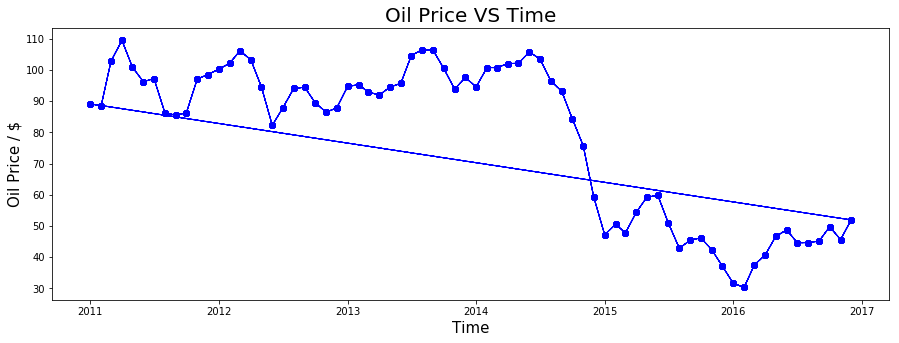

In [160]:
Time_oilprice= plt.plot_date(County_list_Houston["Datetime"], County_list_Houston["Oil Price"] , color="blue", linestyle='--',linewidth=1)
plt.title("Oil Price VS Time",fontsize=20)
plt.xlabel("Time",fontsize=15)
plt.ylabel("Oil Price / $",fontsize=15)
plt.savefig("Oil Price VS Time.png")
plt.show()

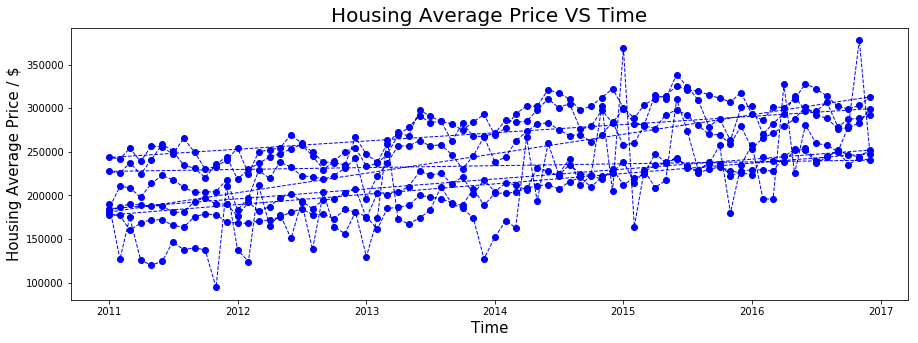

In [161]:
Time_oilprice= plt.plot_date(County_list_Houston["Datetime"], County_list_Houston["Housing Average Price"] , color="blue",linestyle='--',linewidth=1)
plt.title("Housing Average Price VS Time",fontsize=20)
plt.xlabel("Time",fontsize=15)
plt.ylabel("Housing Average Price / $",fontsize=15)
plt.savefig("Housing Average Price VS Time.png")
plt.show()

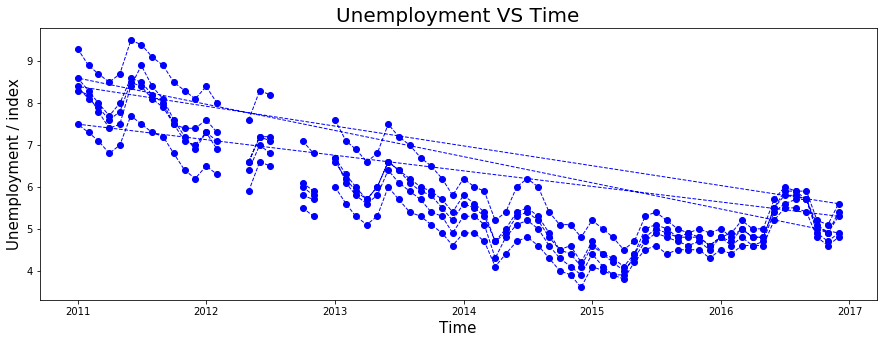

In [162]:
Time_oilprice=plt.plot_date(County_list_Houston["Datetime"], County_list_Houston["Unemployment"] , color="blue",linestyle='--',linewidth=1)
plt.title("Unemployment VS Time",fontsize=20)
plt.xlabel("Time",fontsize=15)
plt.ylabel("Unemployment / index",fontsize=15)
plt.savefig("Unemployment VS Time.png")
plt.show()

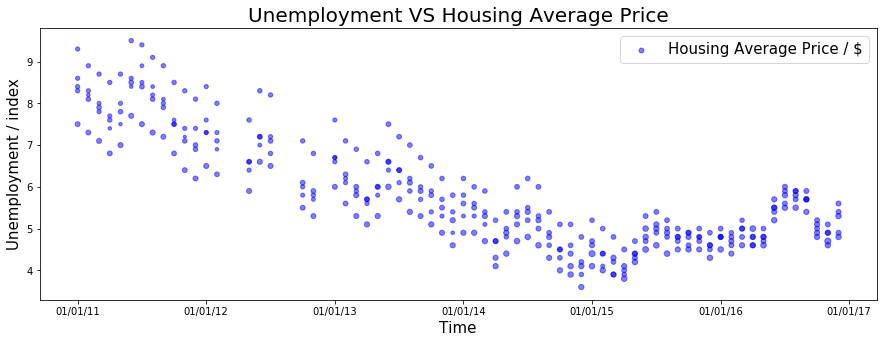

In [183]:
fig, ax= plt.subplots()
ax.scatter(County_list_Houston["Date"],
            County_list_Houston["Unemployment"], 
            s=County_list_Houston["Housing Average Price"]/10000,
            alpha= 0.5, marker="o", color="blue",label="Housing Average Price / $")
plt.xticks(["01/01/11","01/01/12","01/01/13","01/01/14","01/01/15","01/01/16","01/01/17"])
plt.title("Unemployment VS Housing Average Price", fontsize=20)
plt.xlabel("Time", fontsize=15)
plt.ylabel("Unemployment / index",fontsize=15)
plt.legend(fontsize=15)
plt.savefig("Unemployment VS Housing Average Price.png")
plt.show()

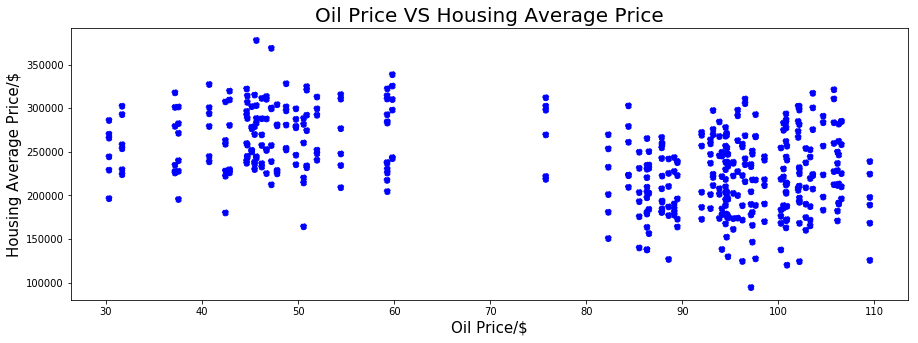

In [185]:

Oil_house= plt.scatter(County_list_Houston["Oil Price"], County_list_Houston["Housing Average Price"],linestyle='--',linewidth=1, marker="o", color="blue")
plt.title("Oil Price VS Housing Average Price", fontsize=20)
plt.xlabel("Oil Price/$",fontsize=15)
plt.ylabel("Housing Average Price/$", fontsize=15)
plt.savefig("Oil Price VS Housing Average Price.png")
plt.show()

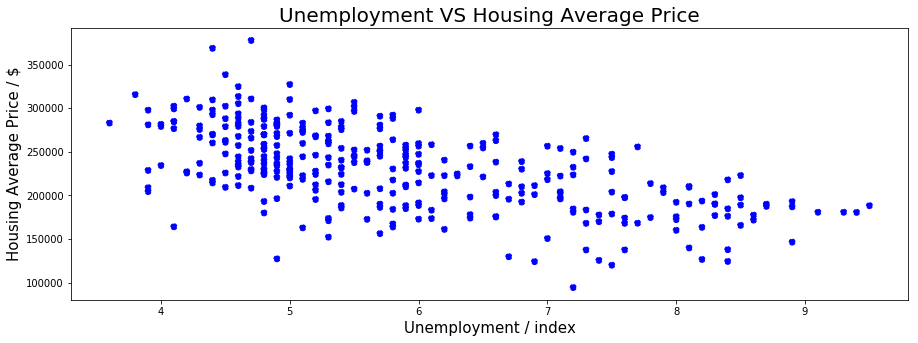

In [186]:
Oil_house= plt.scatter(County_list_Houston["Unemployment"], County_list_Houston["Housing Average Price"],
                       linestyle='--',linewidth=1, color="blue")
plt.title("Unemployment VS Housing Average Price",fontsize=20)
plt.xlabel("Unemployment / index",fontsize=15)
plt.ylabel("Housing Average Price / $",fontsize=15)
plt.savefig("Unemployment VS Housing Average.png")
plt.show()


In [166]:
Houston= pd.read_excel("Houston-Workers-Earnings.xlsx")
Houston=pd.DataFrame(Houston).T
Houston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Activity,Energy and mining,Machinery manufacturing,Fabricated metal manufacturing,Chemicals,Construction,Utilities,Transportation and logistics*,Glass and ceramics,Education,Food services,Business and financial services,Advanced materials,Clusters with location quotient >1,Clusters with location quotient <1,Average earnings (total)
2010,119894,97114,63695,100730,65995,119242,76050,53149,46750,18860,101936,85835,78245,55631,63031
2012,125444,101846,67507,103317,69062,124631,84102,56688,45968,18683,103693,88217,81979,55889,65474
2014,124557,102492,67773,106506,72861,126614,77871,57244,47670,18990,105695,89508,82404,56250,66707
2016,123673,103066,65234,111148,73834,124790,79562,56232,49880,19530,104660,94195,81110,57454,65399


In [167]:
Houston.loc['Activity',:]

0                      Energy and mining
1                Machinery manufacturing
2         Fabricated metal manufacturing
3                              Chemicals
4                           Construction
5                              Utilities
6          Transportation and logistics*
7                     Glass and ceramics
8                              Education
9                          Food services
10       Business and financial services
11                    Advanced materials
12    Clusters with location quotient >1
13    Clusters with location quotient <1
14              Average earnings (total)
Name: Activity, dtype: object

In [168]:
Houston.columns=Houston.loc['Activity',:]
Houston.head()

Activity,Energy and mining,Machinery manufacturing,Fabricated metal manufacturing,Chemicals,Construction,Utilities,Transportation and logistics*,Glass and ceramics,Education,Food services,Business and financial services,Advanced materials,Clusters with location quotient >1,Clusters with location quotient <1,Average earnings (total)
Activity,Energy and mining,Machinery manufacturing,Fabricated metal manufacturing,Chemicals,Construction,Utilities,Transportation and logistics*,Glass and ceramics,Education,Food services,Business and financial services,Advanced materials,Clusters with location quotient >1,Clusters with location quotient <1,Average earnings (total)
2010,119894,97114,63695,100730,65995,119242,76050,53149,46750,18860,101936,85835,78245,55631,63031
2012,125444,101846,67507,103317,69062,124631,84102,56688,45968,18683,103693,88217,81979,55889,65474
2014,124557,102492,67773,106506,72861,126614,77871,57244,47670,18990,105695,89508,82404,56250,66707
2016,123673,103066,65234,111148,73834,124790,79562,56232,49880,19530,104660,94195,81110,57454,65399


In [176]:
Houston.drop("Activity", axis=0, inplace= True)
Houston.head(6)

Activity,Energy and mining,Machinery manufacturing,Fabricated metal manufacturing,Chemicals,Construction,Utilities,Transportation and logistics*,Glass and ceramics,Education,Food services,Business and financial services,Advanced materials,Clusters with location quotient >1,Clusters with location quotient <1,Average earnings (total)
2010,119894,97114,63695,100730,65995,119242,76050,53149,46750,18860,101936,85835,78245,55631,63031
2012,125444,101846,67507,103317,69062,124631,84102,56688,45968,18683,103693,88217,81979,55889,65474
2014,124557,102492,67773,106506,72861,126614,77871,57244,47670,18990,105695,89508,82404,56250,66707
2016,123673,103066,65234,111148,73834,124790,79562,56232,49880,19530,104660,94195,81110,57454,65399
2017(Houston),120706,103421,66269,113496,72883,134235,80508,57804,49985,19514,104444,97136,80337,57303,64953
2017(US),80900,70059,55830,72887,60742,107188,53761,55398,49322,18963,100785,85695,–,–,55375


In [180]:
Houston.columns

Index(['Energy and mining', 'Machinery manufacturing',
       'Fabricated metal manufacturing', 'Chemicals', 'Construction',
       'Utilities', 'Transportation and logistics*', 'Glass and ceramics',
       'Education', 'Food services', 'Business and financial services',
       'Advanced materials', 'Clusters with location quotient >1',
       'Clusters with location quotient <1', 'Average earnings (total)'],
      dtype='object', name='Activity')

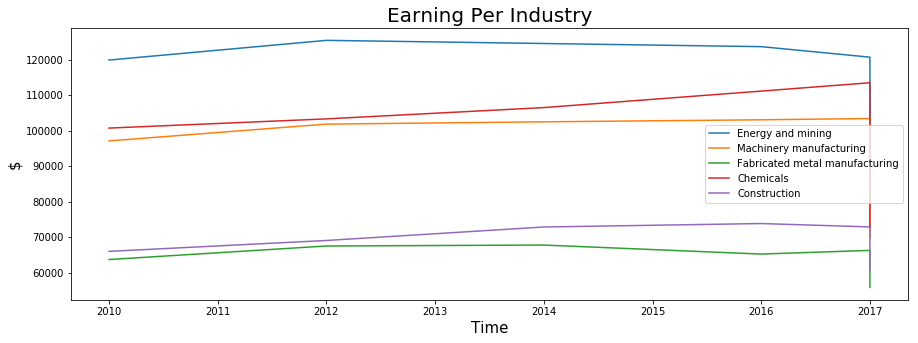

In [178]:
for columns in Houston.columns[:5]:
    plt.plot([2010, 2012, 2014, 2016, 2017,2017], Houston[columns], label=columns)
    plt.legend(loc=5)
    plt.title("Earning Per Industry",fontsize=20)
    plt.xlabel("Time",fontsize=15)
    plt.ylabel("$",fontsize=15)
    plt.savefig("Earning per Industry.png")
    
plt.show()
